In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Impute

Processo de preencher valores inexistentes para observações.

Principais métodos:
* drop
* média
* mediana
* moda (valor mais frequente)
* _forward fill_ (preenche com o último valor válido)
* _backward fill_ (preenche com o próximo valor válido)
* Interpolação
* Regressão linear

https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

In [41]:
N = 500

## Drop

In [57]:
alturas = np.random.normal(1.75, 0.1, size=N)

# remove 20% dos valores
alturas[np.random.randint(0, N, size=int(N * 0.2))] = None

df = pd.DataFrame(data={
    'altura': alturas
})

Média 1.7443403452769055
Quantidade observações 500


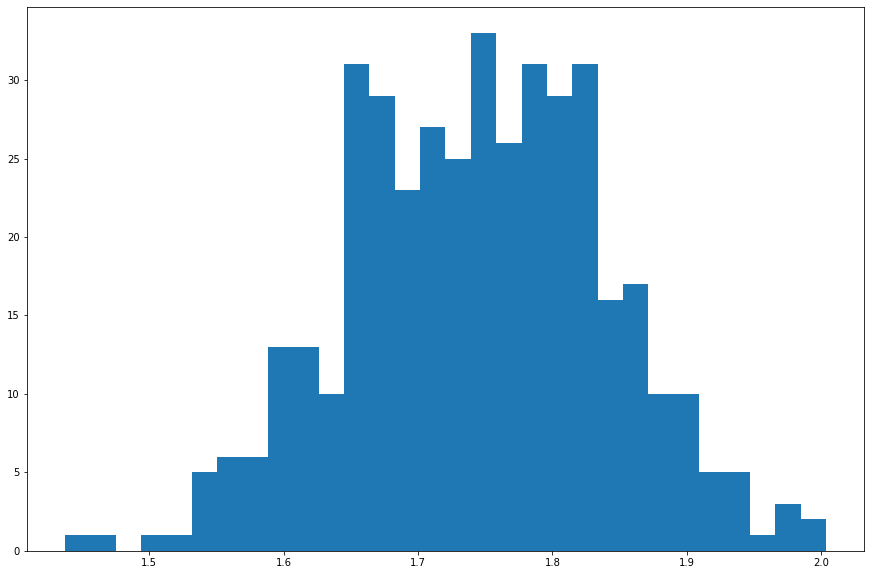

In [61]:
(_, ax) = plt.subplots(1, 1, figsize=(15, 10))
ax.hist(df.altura, bins=30)

print('Média', df.altura.mean())
print('Quantidade observações', len(df))

Média 1.7443403452769055
Quantidade observações 411


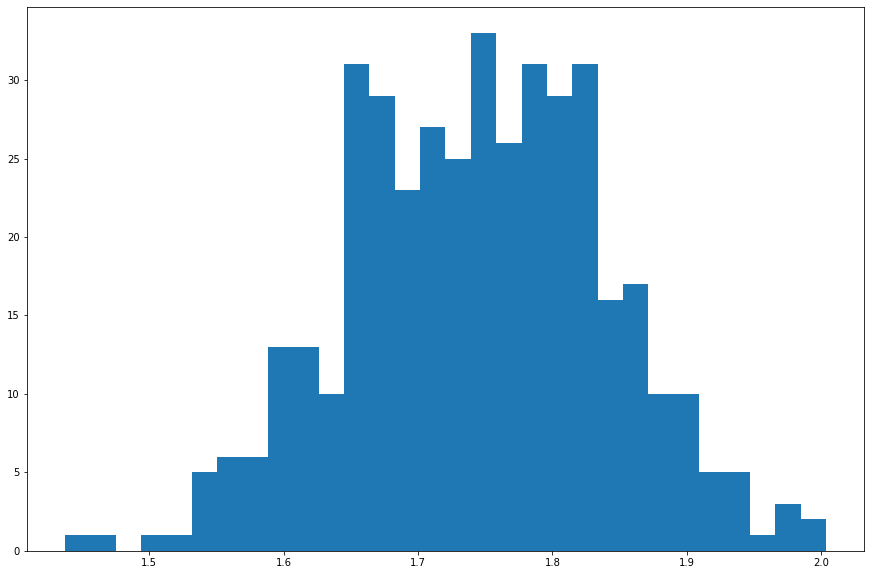

In [62]:
dropped = df.altura.dropna()
(_, ax) = plt.subplots(1, 1, figsize=(15, 10))
ax.hist(df.altura, bins=30)

print('Média', df.altura.mean())
print('Quantidade observações', len(dropped))

## Média

In [47]:
alturas = np.random.normal(1.75, 0.1, size=N)

# remove 20% dos valores
alturas[np.random.randint(0, N, size=int(N * 0.2))] = None

df = pd.DataFrame(data={
    'altura': alturas
})

Média 1.7415956766317184


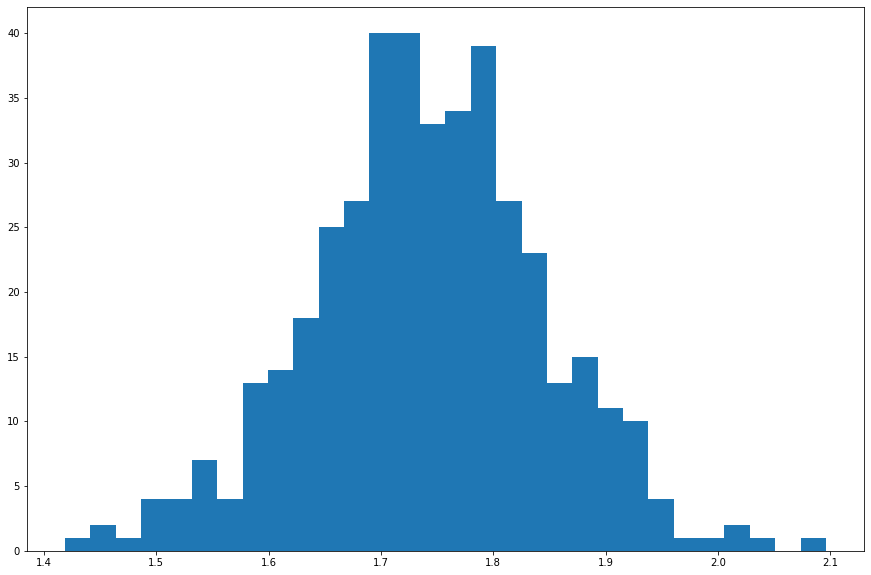

In [52]:
(_, ax) = plt.subplots(1, 1, figsize=(15, 10))
ax.hist(df.altura, bins=30)

print('Média', df.altura.mean())

1.7415956766317184


(array([  1.,   2.,   1.,   4.,   4.,   7.,   4.,  13.,  14.,  18.,  25.,
         27.,  40.,  40., 118.,  34.,  39.,  27.,  23.,  13.,  15.,  11.,
         10.,   4.,   1.,   1.,   2.,   1.,   0.,   1.]),
 array([1.4189159 , 1.44148276, 1.46404962, 1.48661648, 1.50918334,
        1.5317502 , 1.55431706, 1.57688392, 1.59945078, 1.62201763,
        1.64458449, 1.66715135, 1.68971821, 1.71228507, 1.73485193,
        1.75741879, 1.77998565, 1.80255251, 1.82511937, 1.84768623,
        1.87025309, 1.89281995, 1.9153868 , 1.93795366, 1.96052052,
        1.98308738, 2.00565424, 2.0282211 , 2.05078796, 2.07335482,
        2.09592168]),
 <a list of 30 Patch objects>)

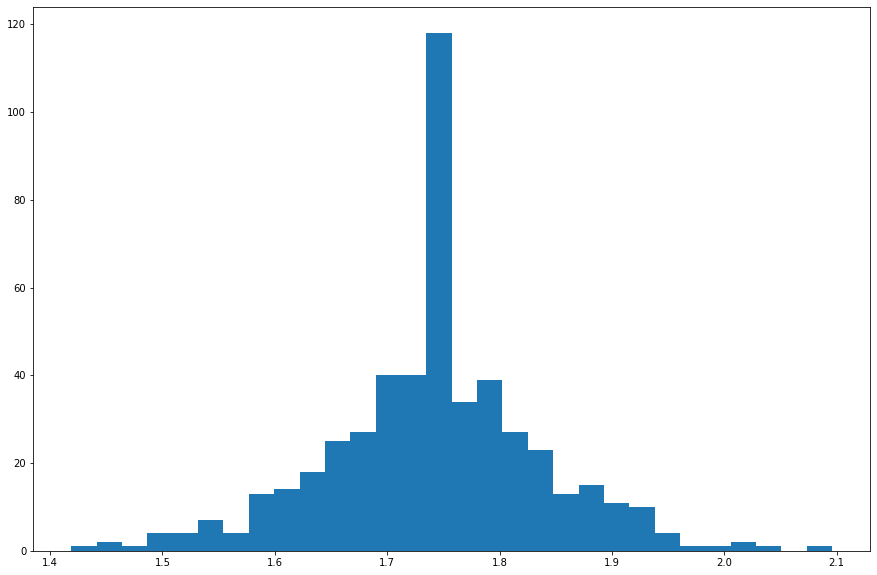

In [54]:
filled = df.altura.fillna(df.altura.mean())
print(filled.mean())

(_, ax) = plt.subplots(1, 1, figsize=(15, 10))
ax.hist(filled, bins=30)

## Mediana

1.7418271865391743


(array([  1.,   2.,   1.,   4.,   4.,   7.,   4.,  13.,  14.,  18.,  25.,
         27.,  40.,  40., 118.,  34.,  39.,  27.,  23.,  13.,  15.,  11.,
         10.,   4.,   1.,   1.,   2.,   1.,   0.,   1.]),
 array([1.4189159 , 1.44148276, 1.46404962, 1.48661648, 1.50918334,
        1.5317502 , 1.55431706, 1.57688392, 1.59945078, 1.62201763,
        1.64458449, 1.66715135, 1.68971821, 1.71228507, 1.73485193,
        1.75741879, 1.77998565, 1.80255251, 1.82511937, 1.84768623,
        1.87025309, 1.89281995, 1.9153868 , 1.93795366, 1.96052052,
        1.98308738, 2.00565424, 2.0282211 , 2.05078796, 2.07335482,
        2.09592168]),
 <a list of 30 Patch objects>)

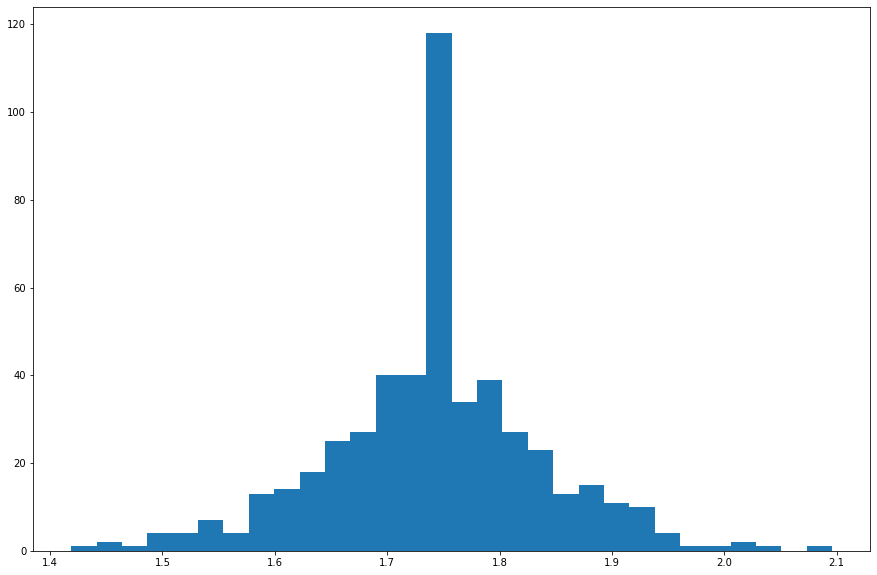

In [55]:
filled = df.altura.fillna(df.altura.median())
print(filled.mean())

(_, ax) = plt.subplots(1, 1, figsize=(15, 10))
ax.hist(filled, bins=30)

## Moda

In [73]:
tipo = np.random.randint(0, 3, size=N).astype(object)
# remove 20% dos valores
tipo[np.random.randint(0, N, size=int(N * 0.2))] = None

df = pd.DataFrame(data={
    'tipo': tipo
})
df.tipo.value_counts()

0    138
2    137
1    131
Name: tipo, dtype: int64

In [78]:
filled = df.tipo.fillna(df.tipo.mode()[0])
filled.value_counts()

0    232
2    137
1    131
Name: tipo, dtype: int64

## Forward fill

In [43]:
preco_base = 56.98
variacoes = np.random.normal(0, 0.01, size=N)
precos = preco_base + np.cumsum(variacoes) * preco_base

# remove 20% dos valores
precos[np.random.randint(0, N, size=int(N * 0.2))] = None

df = pd.DataFrame(data={'preco': precos})

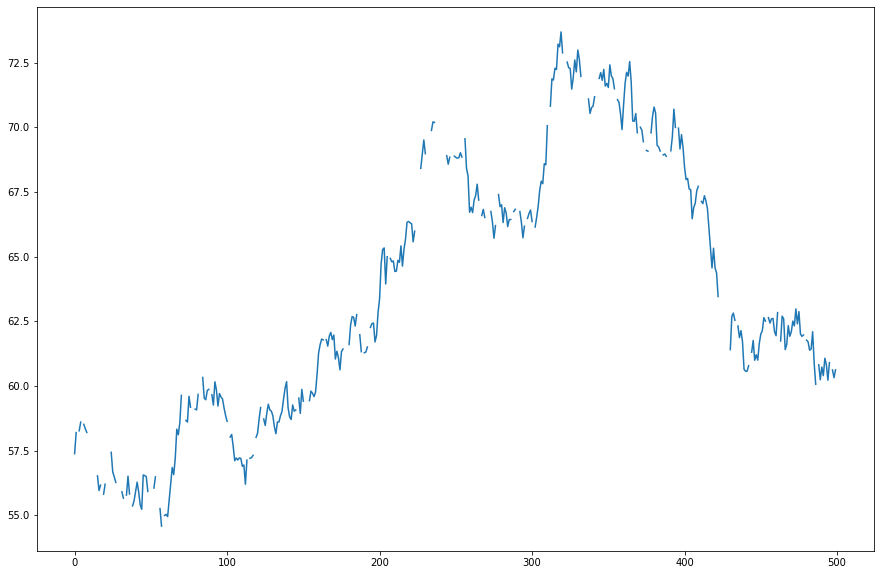

In [44]:
(_, ax) = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(df.preco)

Neste caso, é necessário usar `ffill`, caso contrário, estaríamos preenchendo um dado com um valor do futuro.

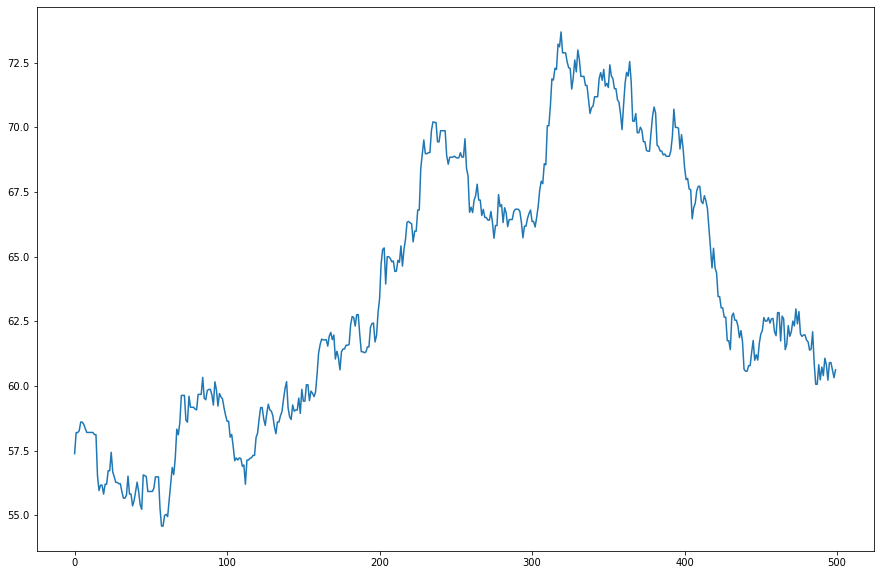

In [45]:
filled = df.preco.fillna(method='ffill')
(_, ax) = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(filled)

In [100]:
quilometros_dia_base = 15
quilometros_viajados = np.random.uniform(0.1, 1, size=N)
quilometros_viajados = np.cumsum(quilometros_dia_base * quilometros_viajados)

# remove 20% dos valores
quilometros_viajados[np.random.randint(0, N, size=int(N * 0.2))] = None

df = pd.DataFrame(data={
    'km': quilometros_viajados
})

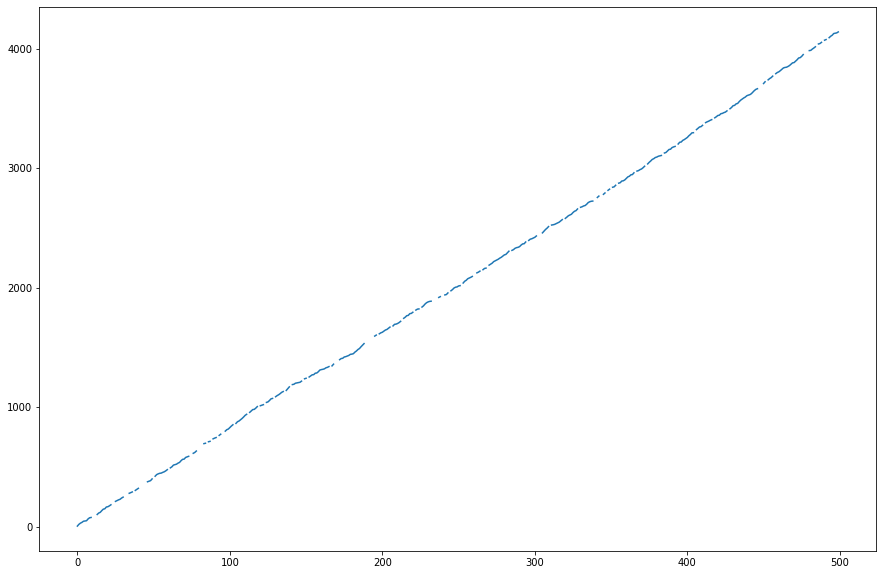

In [101]:
(_, ax) = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(df.km)

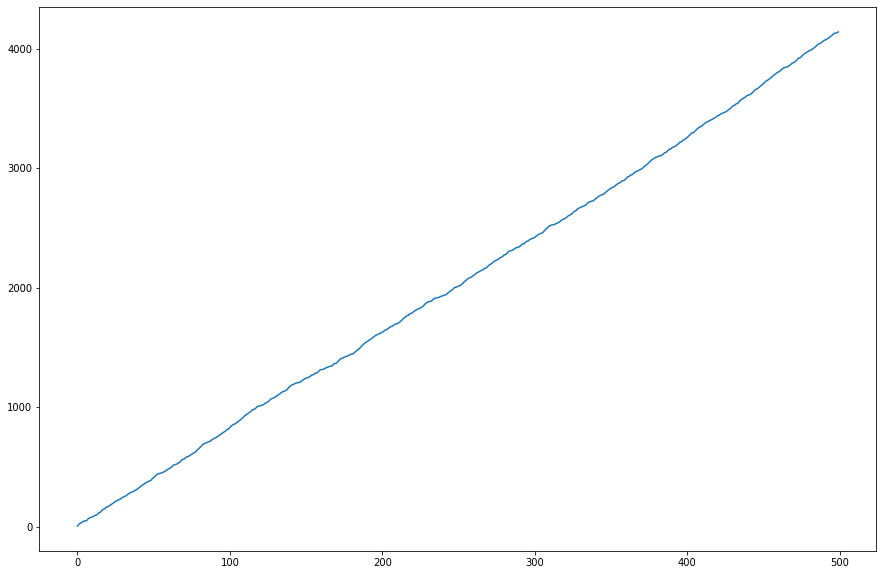

In [102]:
filled = df.km.interpolate(method='linear')
(_, ax) = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(filled)